<a href="https://colab.research.google.com/github/AccidentalGuru/nflfastpy/blob/master/examples/Top%2025%20AY%20Graph%20w%20Roster%20and%20Team%20Logo%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
%pip install nflfastpy --upgrade

In [5]:
import nflfastpy
from nflfastpy.utils import convert_to_gsis_id
from nflfastpy import default_headshot
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import requests

Example default player headshot



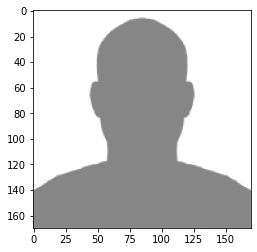

In [6]:
print('Example default player headshot\n')
plt.imshow(default_headshot);

In [13]:
df = nflfastpy.load_pbp_data(year=2020)
roster_df = nflfastpy.load_roster_data()
team_logo_df = nflfastpy.load_team_logo_data()

In [14]:
roster_df = roster_df.loc[roster_df['team.season'] == 2019]

air_yards_df = df.loc[df['pass_attempt'] == 1, ['receiver_player_id', 'receiver_player_name', 'posteam', 'air_yards']]

air_yards_df = air_yards_df.loc[air_yards_df['receiver_player_id'].notnull()]

air_yards_df['gsis_id'] = air_yards_df['receiver_player_id'].apply(convert_to_gsis_id)

#grabbing the top 5 air yards
top_25 = air_yards_df.groupby('gsis_id')['air_yards'].sum().sort_values(ascending=False)[:25].index.unique()

air_yards_df = air_yards_df.loc[air_yards_df['gsis_id'].isin(top_25)]

air_yards_df.head()

,receiver_player_id,receiver_player_name,posteam,air_yards,gsis_id
9,32013030-2d30-3033-3035-3634b926c47f,D.Hopkins,ARI,3.0,00-0030564
18,32013030-2d30-3033-3035-3634b926c47f,D.Hopkins,ARI,-4.0,00-0030564
51,32013030-2d30-3033-3035-3634b926c47f,D.Hopkins,ARI,-1.0,00-0030564
52,32013030-2d30-3033-3035-3634b926c47f,D.Hopkins,ARI,6.0,00-0030564
56,32013030-2d30-3033-3035-3634b926c47f,D.Hopkins,ARI,-2.0,00-0030564


In [15]:
air_yards_df['receiver_player_name'].unique()

array(['D.Hopkins', 'A.Robinson', 'M.Jones', 'M.Brown', 'M.Gallup',
       'D.Adams', 'A.Thielen', 'M.Valdes-Scantling', 'J.Jefferson',
       'T.Kelce', 'T.Hill', 'D.Chark', 'K.Allen', 'M.Williams', 'A.Green',
       'R.Anderson', 'D.Moore', 'S.Diggs', 'T.McLaurin', 'C.Claypool',
       'C.Ridley', 'T.Lockett', 'D.Metcalf', 'J.Jeudy', 'T.Higgins',
       'D.Chark Jr.'], dtype=object)

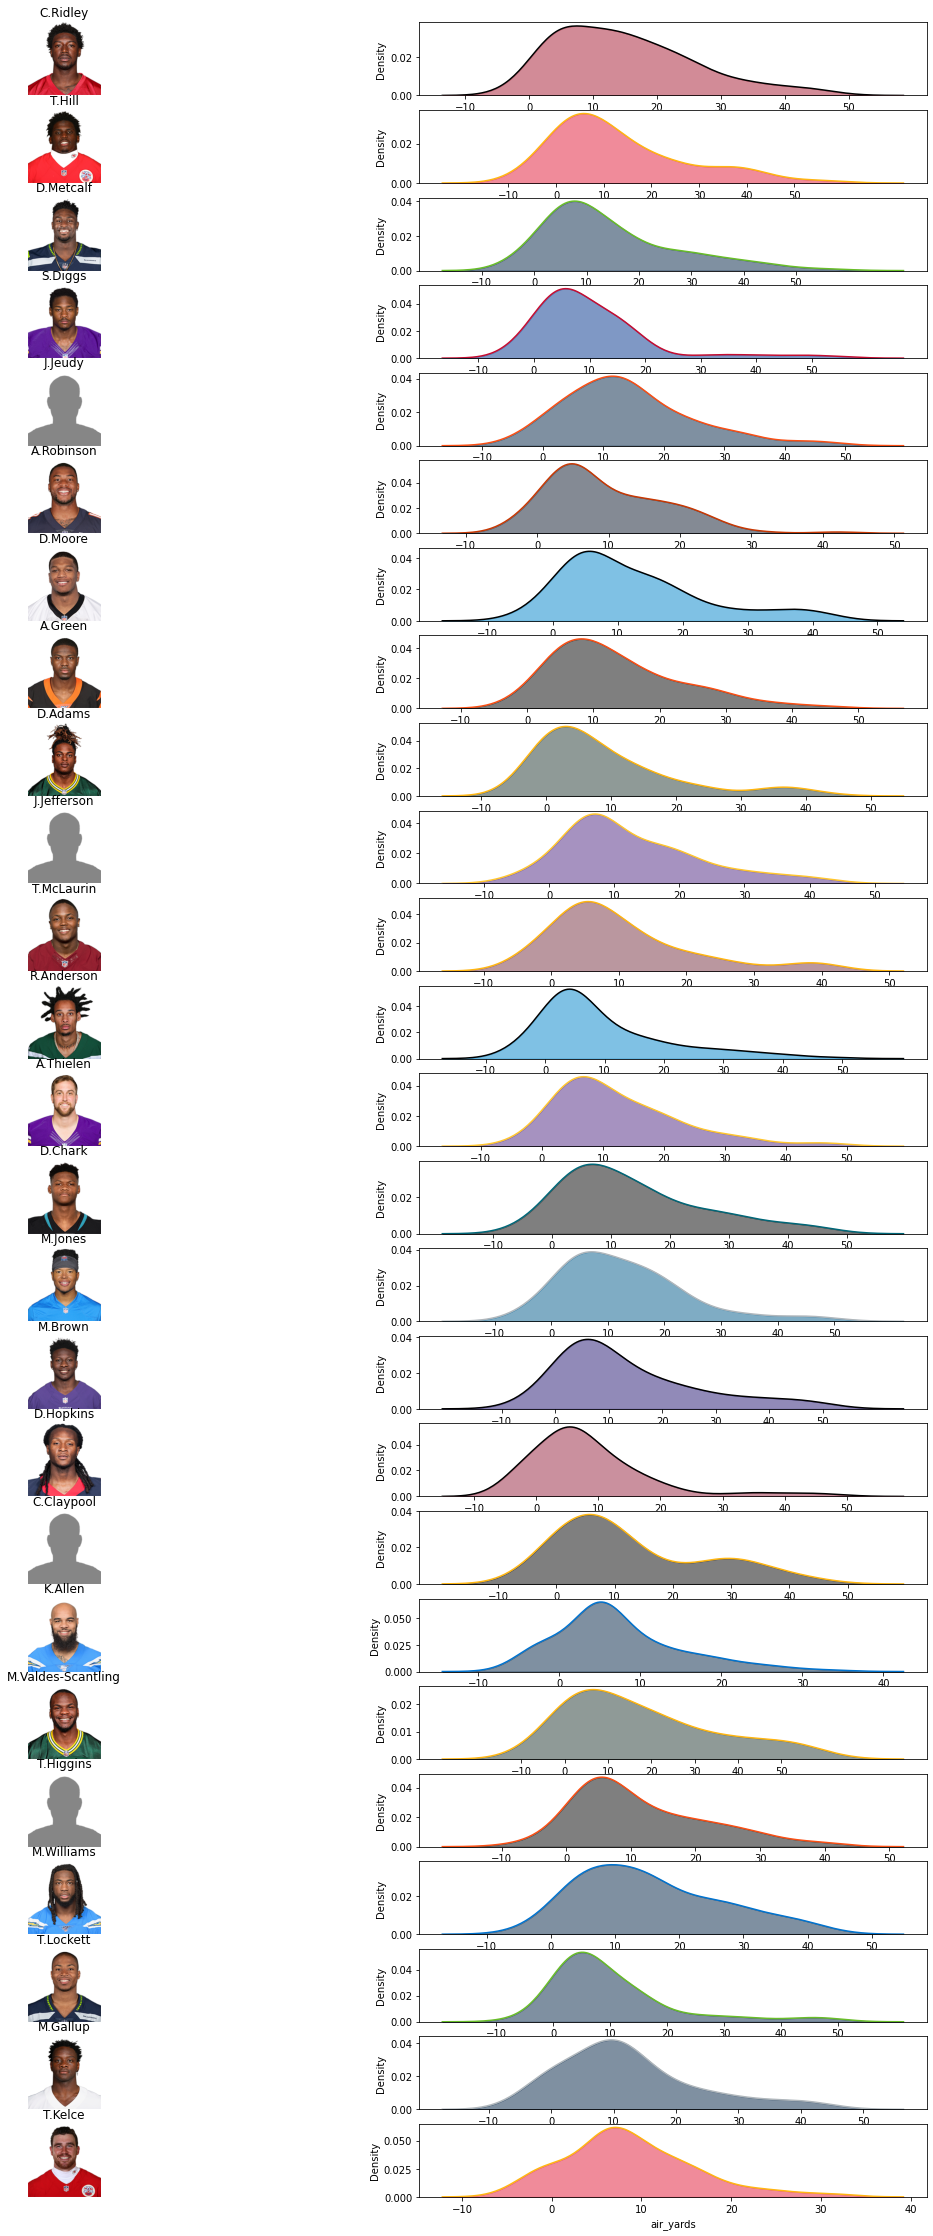

In [19]:
fig, axes = plt.subplots(25, 2, figsize=(20, 40))

for i, row in enumerate(axes):
    
    ax1, ax2 = row[0], row[1]
    
    player_gsis_id = top_25[i]
    player_df = air_yards_df.loc[air_yards_df['gsis_id'] == player_gsis_id]
    team_logo_data = team_logo_df.loc[team_logo_df['team_abbr'] == player_df['posteam'].values[0]]
    team_color_1 = team_logo_data['team_color'].values[0]
    team_color_2 = team_logo_data['team_color2'].values[0]

    player_roster_data = roster_df.loc[roster_df['teamPlayers.gsisId'] == player_gsis_id]

    if player_roster_data.empty:
        #if the player is a rookie
        a = default_headshot
    else:
        player_headshot = player_roster_data['teamPlayers.headshot_url'].values[0]
        a = plt.imread(player_headshot)
    
    ax1.set_title(player_df['receiver_player_name'].values[0])
    ax1.imshow(a)
    ax1.axis('off')
    sns.kdeplot(player_df['air_yards'], color=team_color_2, ax=ax2)
    x = ax2.get_lines()[0].get_xydata()[:, 0]
    y = ax2.get_lines()[0].get_xydata()[:, 1]
    ax2.set_xticks(range(-10, 60, 10))
    ax2.fill_between(x, y, color=team_color_1, alpha=0.5)

plt.show();